In [78]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)

## Data Processing

In [79]:
ct4 = pd.read_csv('./data/covid_train4.csv')
metadata = pd.read_csv('./data/metadata.csv')
cgrt = pd.read_csv('./data/OxCGRT_latest.csv')


In [80]:
print(ct4.shape)
print('\n')
print(ct4.head())
print('\n')
print(ct4.tail())
print('\n')
print('-'*100)

print(metadata.shape)
print('\n')
print(metadata.head())
print('\n')
print(metadata.tail())
print('\n')
print('-'*100)

print(cgrt.shape)
print('\n')
print(cgrt.head())
print('\n')
print(cgrt.tail())
print('\n')



(35995, 6)


   Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0


          Id Province_State Country_Region        Date  ConfirmedCases  \
35990  35991            NaN       Zimbabwe  2020-05-11            36.0   
35991  35992            NaN       Zimbabwe  2020-05-12            36.0   
35992  35993            NaN       Zimbabwe  2020-05-13            37.0   
35993  35994            NaN       Zimbabwe  2020-05-14            37.0   
35994  35995            NaN       Zimbabwe  2020-05-15            42.0   

       Fatalities  
35990         4.0  
35991         4.0  
35992         4.0  
3599

### Data Cleaning

In [81]:
ct4.drop(['Id'], axis=1, inplace=True)
ct4['Province_State'].fillna('', inplace=True)
print(ct4.head())

  Province_State Country_Region        Date  ConfirmedCases  Fatalities
0                   Afghanistan  2020-01-22             0.0         0.0
1                   Afghanistan  2020-01-23             0.0         0.0
2                   Afghanistan  2020-01-24             0.0         0.0
3                   Afghanistan  2020-01-25             0.0         0.0
4                   Afghanistan  2020-01-26             0.0         0.0


In [82]:
cgrt.drop(['CountryCode','E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndexForDisplay', 'LegacyStringencyIndex',
       'LegacyStringencyIndexForDisplay'], axis=1, inplace=True)
print(cgrt.columns)


Index(['CountryName', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'H1_Public information campaigns',
       'H1_Flag', 'StringencyIndex'],
      dtype='object')


In [83]:
metadata['Province_State'].fillna('', inplace=True)
print(metadata.head())

  Country_Region Province_State      lat      lon continent  population  \
0    Afghanistan                 33.0000  65.0000      Asia    38041754   
1        Albania                 41.1533  20.1683    Europe     2880917   
2        Algeria                 28.0339   1.6596    Africa    43053054   
3        Andorra                 42.5063   1.5218    Europe       77142   
4         Angola                -11.2027  17.8739    Africa    31825295   

      area  density  
0   652230    58.33  
1    28748   100.21  
2  2381741    18.08  
3      468   164.83  
4  1246700    25.53  


### Data  Filtering
### Filter rows with the most recent day of the column 'Date' in covid data set

In [84]:
start_date = ct4['Date'].min()
end_date = ct4['Date'].max()
print(start_date)
print(end_date)

2020-01-22
2020-05-15


In [85]:
recent_ct4 = ct4[(ct4.Date == end_date)]
print(recent_ct4)

      Province_State      Country_Region        Date  ConfirmedCases  \
114                          Afghanistan  2020-05-15          6053.0   
229                              Albania  2020-05-15           916.0   
344                              Algeria  2020-05-15          6629.0   
459                              Andorra  2020-05-15           761.0   
574                               Angola  2020-05-15            48.0   
...              ...                 ...         ...             ...   
35534                            Vietnam  2020-05-15           314.0   
35649                 West Bank and Gaza  2020-05-15           375.0   
35764                     Western Sahara  2020-05-15             6.0   
35879                             Zambia  2020-05-15           654.0   
35994                           Zimbabwe  2020-05-15            42.0   

       Fatalities  
114         153.0  
229          31.0  
344         536.0  
459          49.0  
574           2.0  
...           .

In [86]:
new_cgrt = cgrt[(cgrt.CountryName.isin(['Australia', 'China', 'Japan', 'New Zealand', 'Singapore', 'South Korea']))]
print(new_cgrt['CountryName'].unique())

['Australia' 'China' 'Japan' 'South Korea' 'New Zealand' 'Singapore']


### Data  Grouping

In [87]:
#use groupby function of python
gr_recent_ct4 = recent_ct4.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum()
print(gr_recent_ct4)

                    ConfirmedCases  Fatalities
Country_Region                                
Afghanistan                 6053.0       153.0
Albania                      916.0        31.0
Algeria                     6629.0       536.0
Andorra                      761.0        49.0
Angola                        48.0         2.0
...                            ...         ...
Vietnam                      314.0         0.0
West Bank and Gaza           375.0         2.0
Western Sahara                 6.0         0.0
Zambia                       654.0         7.0
Zimbabwe                      42.0         4.0

[184 rows x 2 columns]


### Data Merging
### Join the table from covid_train4 dataset with the metadata table

In [88]:
#print(gr_recent_ct4['Country_Region'].head())
#print(metadata['Country_Region'].head())
gr_recent_ct4.reset_index(level=['Country_Region'], inplace=True)
print(gr_recent_ct4['Country_Region'].head())
print(metadata['Country_Region'].head())

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country_Region, dtype: object
0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country_Region, dtype: object


In [89]:
new_metadata = metadata[metadata['Province_State'] == '']
print(new_metadata)

         Country_Region Province_State      lat      lon continent  \
0           Afghanistan                 33.0000  65.0000      Asia   
1               Albania                 41.1533  20.1683    Europe   
2               Algeria                 28.0339   1.6596    Africa   
3               Andorra                 42.5063   1.5218    Europe   
4                Angola                -11.2027  17.8739    Africa   
..                  ...            ...      ...      ...       ...   
315  West Bank and Gaza                 31.6000  34.8000      Asia   
316      Western Sahara                 24.2155 -12.8858    Africa   
317               Yemen                 15.5527  48.5164      Asia   
318              Zambia                -15.4167  28.2833    Africa   
319            Zimbabwe                -20.0000  30.0000    Africa   

     population     area  density  
0      38041754   652230    58.33  
1       2880917    28748   100.21  
2      43053054  2381741    18.08  
3         77142

In [90]:
merge_ct4 = pd.merge(gr_recent_ct4, new_metadata, on='Country_Region')
merge_ct4.drop(['Province_State'], axis=1, inplace=True)
print(merge_ct4)

         Country_Region  ConfirmedCases  Fatalities      lat       lon  \
0           Afghanistan          6053.0       153.0  33.0000   65.0000   
1               Albania           916.0        31.0  41.1533   20.1683   
2               Algeria          6629.0       536.0  28.0339    1.6596   
3               Andorra           761.0        49.0  42.5063    1.5218   
4                Angola            48.0         2.0 -11.2027   17.8739   
..                  ...             ...         ...      ...       ...   
179             Vietnam           314.0         0.0  16.0000  108.0000   
180  West Bank and Gaza           375.0         2.0  31.6000   34.8000   
181      Western Sahara             6.0         0.0  24.2155  -12.8858   
182              Zambia           654.0         7.0 -15.4167   28.2833   
183            Zimbabwe            42.0         4.0 -20.0000   30.0000   

    continent  population     area  density  
0        Asia    38041754   652230    58.33  
1      Europe     2

## Data Visualization

In [91]:
merge_ct4.sort_values(by=['ConfirmedCases'], inplace=True, ascending=False)
top_10 = merge_ct4.head(10)
print(top_10)

     Country_Region  ConfirmedCases  Fatalities      lat      lon continent  \
171              US       1442653.0     87525.0  37.0902 -95.7129  Americas   
138          Russia        262843.0      2418.0  60.0000  90.0000    Europe   
175  United Kingdom        238004.0     34078.0  55.3781  -3.4360    Europe   
156           Spain        230183.0     27459.0  40.0000  -4.0000    Europe   
84            Italy        223885.0     31610.0  43.0000  12.0000    Europe   
23           Brazil        220291.0     14962.0 -14.2350 -51.9253  Americas   
61           France        179630.0     27532.0  46.2276   2.2137    Europe   
65          Germany        175233.0      7897.0  51.0000   9.0000    Europe   
170          Turkey        146457.0      4055.0  38.9637  35.2433      Asia   
80             Iran        116635.0      6902.0  32.0000  53.0000      Asia   

     population      area  density  
171   328239523   3796742    86.45  
138   145872256  17098246     8.53  
175    67530172    

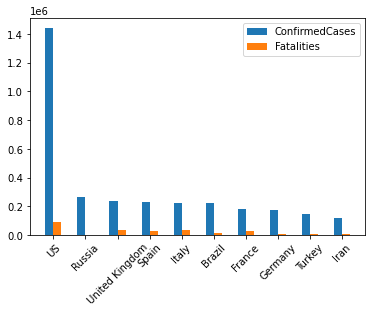

In [92]:
#visualize the barchart of top 10 contries' 'ConfirmedCases' and 'Fatalities'
import numpy as np
labels = top_10['Country_Region']
cc = top_10['ConfirmedCases']
fat = top_10['Fatalities']

x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.125, cc, 0.25, label='ConfirmedCases')
rects2 = ax.bar(x+0.125, fat, 0.25, label='Fatalities')

ax.set_xticks(x)
ax.set_xticklabels(labels)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
ax.legend()

plt.yscale('linear')

plt.show()

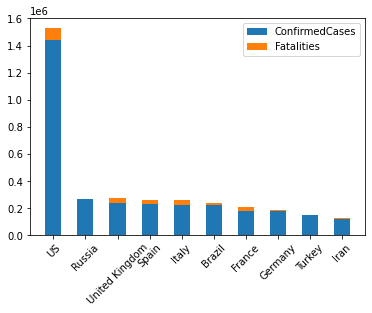

In [93]:
#visualize the barchart of top 10 contries' 'ConfirmedCases' and 'Fatalities'
fig, ax = plt.subplots()
ax.bar(labels, cc, 0.5, label = 'ConfirmedCases')
ax.bar(labels, fat, 0.5, bottom=cc, label='Fatalities')

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax.legend()
plt.show()


### Visualize data to express corona infection situation globally

In [94]:
#using folium package
global_map = folium.Map()

for i in range(0, len(merge_ct4)):
    folium.Circle(
    location = [merge_ct4.iloc[i]['lat'], merge_ct4.iloc[i]['lon']],
    fill=True,
    radius = merge_ct4.iloc[i]['ConfirmedCases'],
    color='red'
    ).add_to(global_map)

global_map

### Visualize data to express corona infection situation according to date

In [95]:
covid = pd.read_csv('./data/covid_for_visualize.csv')
print(covid)
print(covid.shape)

         Date  Australia    China    Japan  NewZealand  Singapore  SouthKorea
0    20200101        0.0     27.0      0.0         0.0        0.0         0.0
1    20200102        0.0     27.0      0.0         0.0        0.0         0.0
2    20200103        0.0     44.0      0.0         0.0        0.0         0.0
3    20200104        0.0     44.0      0.0         0.0        0.0         0.0
4    20200105        0.0     59.0      0.0         0.0        0.0         0.0
..        ...        ...      ...      ...         ...        ...         ...
130  20200510     6929.0  83991.0  15747.0      1144.0    22460.0     10874.0
131  20200511     6941.0  84010.0  15798.0      1147.0    23336.0     10909.0
132  20200512     6948.0  84011.0  15874.0      1147.0    23787.0     10936.0
133  20200513     6964.0  84018.0  16024.0      1147.0    24671.0     10962.0
134  20200514     6975.0  84024.0  16079.0      1147.0    25346.0     10991.0

[135 rows x 7 columns]
(135, 7)


In [96]:
cols = list(covid.columns)
colors = ['orange', 'blue', 'green', 'purple', 'red', 'turquoise']
covid.iplot(kind='line', x=cols[0], y=cols[1:], color=colors, vline=['20200214', '20200314', '20200414'])

In [97]:
figs=cf.figures(covid, [dict(kind='line', x=cols[0], y=cols[i], color=colors[i-1], fill=True) for i in range(1,len(cols))], asList=True)
sp = cf.subplots(figs, shape = (len(cols)-1,1), shared_xaxes=True)
cf.iplot(sp)

In [98]:
figs=cf.figures(covid, [dict(kind='line', x=cols[0], y=cols[i], color=colors[i-1]) for i in range(1,len(cols))], asList=True)
sp = cf.subplots(figs, shape = (3,2), subplot_titles=cols[1:])
cf.iplot(sp)

### Visualize data with the bubble plot about COVID-19 Infection Situation

In [99]:
merge_ct4['DeathRate'] = (merge_ct4['Fatalities']/merge_ct4['ConfirmedCases'])*100
df = merge_ct4.sort_values(by=['DeathRate'], ascending=False)
fig = px.scatter(df, x='density', y='DeathRate', size='ConfirmedCases', color='continent', hover_name='Country_Region', log_x=True, size_max=80)
fig.show()